In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/education454/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 30.32 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [4]:
import os
base_dir ='/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

In [5]:
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [6]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:3])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:3])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:3])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:3])

['COVID19(474).jpg', 'COVID19(88).jpg', 'COVID19(62).jpg']
['NORMAL(1228).jpg', 'NORMAL(175).jpg', 'NORMAL(87).jpg']
['COVID19(552).jpg', 'COVID-19 (875).jpg', 'COVID19(63).jpg']
['NORMAL(650).jpg', 'NORMAL(1402).jpg', 'NORMAL(727).jpg']


In [7]:
print("train dataset covid images: ",len(train_covid_names))
print("train dataset normal images: ", len(train_normal_names))
print("test dataset covid images: ",len(test_covid_names))
print("test dataset normal images: ", len(test_normal_names))
print("total train dataset  images: ",len(train_covid_names)+len(train_normal_names))
print("total test dataset images: ",len(test_covid_names)+len(test_normal_names))


train dataset covid images:  545
train dataset normal images:  1266
test dataset covid images:  167
test dataset normal images:  317
total train dataset  images:  1811
total test dataset images:  484


['/content/datasets/Data/train/COVID19/COVID19(474).jpg', '/content/datasets/Data/train/COVID19/COVID19(88).jpg', '/content/datasets/Data/train/COVID19/COVID19(62).jpg', '/content/datasets/Data/train/COVID19/COVID19(403).jpg', '/content/datasets/Data/train/COVID19/COVID19(162).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (3).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (169).jpg', '/content/datasets/Data/train/COVID19/COVID19(454).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1228).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(175).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(87).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1081).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(998).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1562).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(304).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1355).jpg']


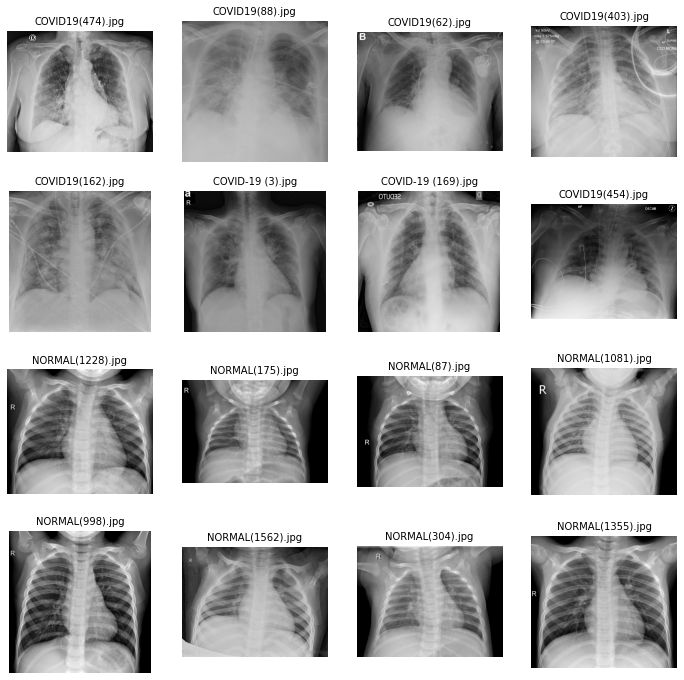

In [8]:
#visualization
import matplotlib.image as mpimg

#number of columns and rows
nrows = 4
ncols = 4

#figsize
fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]

#print list
print(next_covid_pic)
print(next_normal_pic)

#plot grid 

for i,img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap = 'gray')

plt.show()

In [9]:
#Data Augmentation
#Generator for trainning data
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2,zoom_range=0.2,horizontal_flip=True)

#Generator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

#Generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),subset = 'training',batch_size = 32,class_mode = 'binary')
validation_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),subset = 'validation',batch_size = 32,class_mode = 'binary') 

test_generator = test_datagen.flow_from_directory(test_dir,target_size = (150,150) , batch_size = 32,class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [10]:
#classes in which training dataset is divided
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [11]:
train_generator.image_shape
#height,width and color channels

(150, 150, 3)

In [12]:
#CNN Model

model = Sequential()

#add convolutional layer
#filters,size of filters,padding,activation_function,input_shape

model.add(Conv2D(32 ,(5,5) , padding = 'SAME',activation='relu',input_shape = (150,150,3)))

#pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Dropout regularization
model.add(Dropout(0.5))

model.add(Conv2D(64 ,(5,5) , padding = 'SAME',activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Dropout regularization
model.add(Dropout(0.5))

#Image is flatten to 1D array
model.add(Flatten())

#add a Dense layer :amount of nodes,activation
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

#Final Output
model.add(Dense(1,activation = 'sigmoid'))

#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
#Compile and Train Model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(train_generator,epochs = 30,validation_data=validation_generator,validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
46/46 [==============================] - 76s 959ms/step - loss: 1.4787 - accuracy: 0.6977 - val_loss: 0.3669 - val_accuracy: 0.8531
Epoch 2/30
46/46 [==============================] - 44s 950ms/step - loss: 0.2522 - accuracy: 0.8992 - val_loss: 0.1858 - val_accuracy: 0.9375
Epoch 3/30
46/46 [==============================] - 44s 951ms/step - loss: 0.1791 - accuracy: 0.9351 - val_loss: 0.1113 - val_accuracy: 0.9594
Epoch 4/30
46/46 [==============================] - 44s 956ms/step - loss: 0.1522 - accuracy: 0.9386 - val_loss: 0.1278 - val_accuracy: 0.9625
Epoch 5/30
46/46 [==============================] - 43s 944ms/step - loss: 0.1562 - accuracy: 0.9489 - val_loss: 0.1378 - val_accuracy: 0.9656
Epoch 6/30
46/46 [==============================] - 44s 954ms/step - loss: 0.1401 - accuracy: 0.9524 - val_loss: 0.1095 - val_accuracy: 0.9625
Epoch 7/30
46/46 [==============================] - 44s 951ms/step - loss: 0.1371 - accuracy: 0.9600 - val_loss: 0.1045 - val_accuracy: 0.9531

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('training and validation loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test accuracy :{} ,test_loss :{}'.format(test_acc,test_loss))

In [ ]:
#testing on image

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  print(path)
  img = image.load_img(path , target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis = 0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19 positive ')
  else:
    print('Normal')

In [ ]:
model.save('model.h5')